<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Проверим сразу NaNs:

In [4]:
df[df.isna().any(axis=1)].head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0


Построить частотный график для двух параметров: Freedom и positive affect. 
Какое это распределение?

Представлены равномерные распределения:


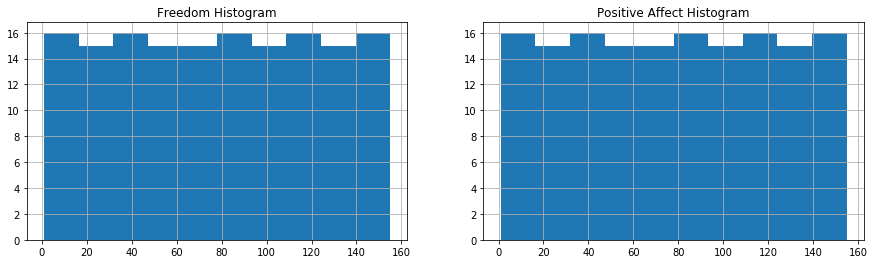

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

ax1 = df['Freedom'].dropna().hist(bins = 10, ax = ax1)
ax2 = df['Positive affect'].dropna().hist(bins = 10, ax = ax2)

ax1.set_title('Freedom Histogram')
ax2.set_title('Positive Affect Histogram')

print('Представлены равномерные распределения:')

In [6]:
try: 
    moda = statistics.mode(df['Freedom'].dropna())
except:
    moda = "Ошибка: не получается посчитать моду, т.к. все значения уникальны, не повторяются"

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [7]:
print('Медиана: ', statistics.median(df['Freedom'].dropna()))
print('Мода: ', moda)
print('Мат. ожидание: ', statistics.mean(df['Freedom'].dropna()))
print('Стандт. отклонение: ', statistics.pstdev(df['Freedom'].dropna()))
print('Дисперсия: ', statistics.pvariance(df['Freedom'].dropna()))
print('Минимум: ', min(df['Freedom']))
print('Максимум: ', max(df['Freedom']))
print('Размах: ', max(df['Freedom']) - min(df['Freedom']))
print('Выбросы: отсутствуют, т.к. распределение равномерное')

Медиана:  78.0
Мода:  Ошибка: не получается посчитать моду, т.к. все значения уникальны, не повторяются
Мат. ожидание:  78.0
Стандт. отклонение:  44.74371464239419
Дисперсия:  2002.0
Минимум:  1.0
Максимум:  155.0
Размах:  154.0
Выбросы: отсутствуют, т.к. распределение равномерное


Почему нельзя найти моду? т.к. все значения уникальны, не повторяются

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601656 - умеренная положительная линейная зависимость


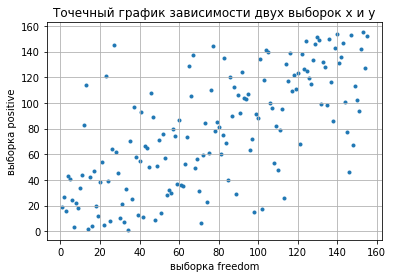

In [8]:
from scipy.stats import pearsonr

freedom = df['Freedom'].dropna()
positive = df['Positive affect'].dropna()
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive, marker='.')

corr, p_value = pearsonr(freedom, positive)
print('Коэффициент корреляции Пирсона:', corr, '- умеренная положительная линейная зависимость')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [9]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

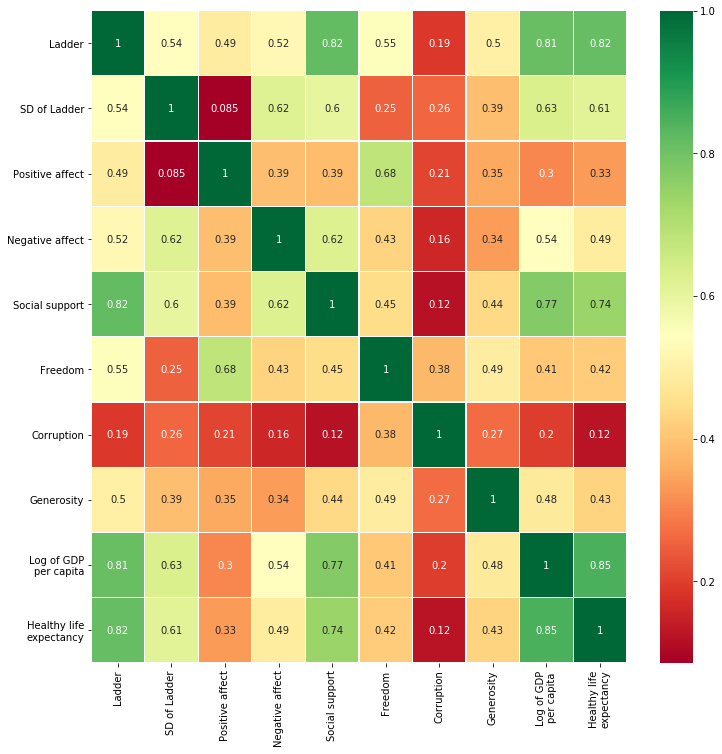

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

- Social support & Ladder 
- Log of GDP per capita & Ladder
- Healthy life expectancy & Ladder
- Log of GDP per capita & Social support
- Healthy life expectancy & Social support
- Healthy life expectancy & Log of GDP per capita 

Загрузить таблицу цен на авокадо: 

In [11]:
import io
import requests

url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Нормальное распределение:


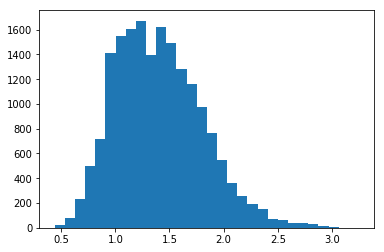

In [12]:
plt.hist(df['AveragePrice'], bins=30)
print('Нормальное распределение:')
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

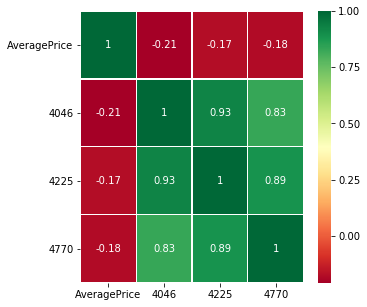

In [13]:
df_corr = df[['AveragePrice', '4046', '4225', '4770']]

sns.heatmap(df_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
PREDICTION_TYPE = 'organic'
df_org = df[df.type == PREDICTION_TYPE]

In [16]:
regions = df_org.groupby(df_org.region)
print("Всего регионов в выборке :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Всего регионов в выборке : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169

In [17]:
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

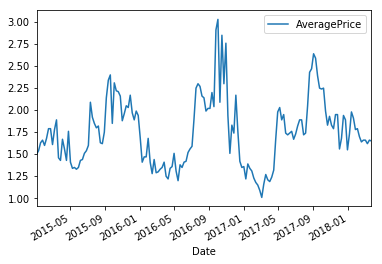

In [18]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [19]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [20]:
date_price = date_price.sort_values(by='ds')

In [21]:
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]

In [22]:
import pandas as pd
from fbprophet import Prophet

In [23]:
from fbprophet import Prophet

In [24]:
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
train_price.tail()

,ds,y
130,2017-07-02,1.73
129,2017-07-09,1.82
128,2017-07-16,1.89
127,2017-07-23,1.89
126,2017-07-30,1.72


In [26]:
test_price.tail()

,ds,y
161,2018-02-25,1.66
160,2018-03-04,1.66
159,2018-03-11,1.62
158,2018-03-18,1.66
157,2018-03-25,1.65


In [27]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [28]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784347,1.221683,1.793699,1.784347,1.784347,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,-0.279665,0.0,0.0,0.0,1.504682
1,2015-01-11,1.783780,1.202386,1.810773,1.783780,1.783780,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,-0.285278,0.0,0.0,0.0,1.498502
2,2015-01-18,1.783212,1.228729,1.773030,1.783212,1.783212,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,-0.278068,0.0,0.0,0.0,1.505144
3,2015-01-25,1.782644,1.216060,1.780143,1.782644,1.782644,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,-0.275841,0.0,0.0,0.0,1.506804
4,2015-02-01,1.782077,1.235702,1.802463,1.782077,1.782077,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,-0.276099,0.0,0.0,0.0,1.505978


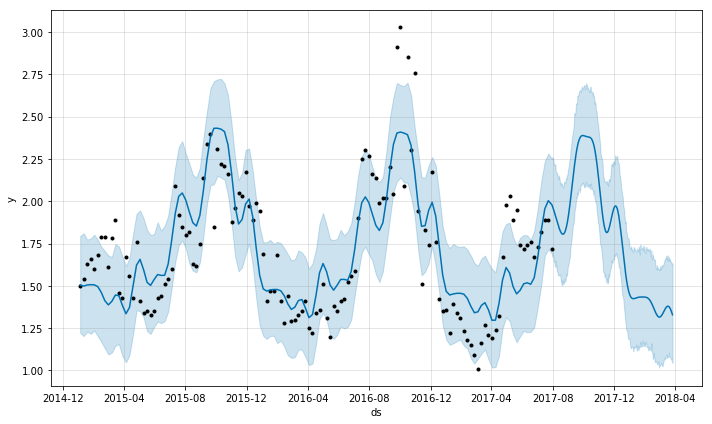

In [29]:
fig1 = m.plot(forecast)

Факт vs Прогноз:

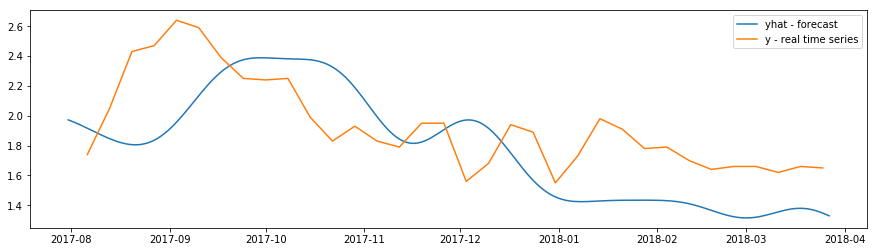

In [36]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='yhat - forecast')
plt.plot(test_price['ds'], test_price['y'], label='y - real time series')
plt.legend()
plt.show()